## Introduction

This project demonstrates the application of Active Graph Networks (AGN) for real-time video processing and enhancement. AGN provides a novel approach to dynamically storing and processing relationships within incoming video frames, enabling intelligent decision-making and advanced visual effects. The code allows for the application of multiple effects, including UV filtering, night vision simulation, and edge detection, while simultaneously building a graph-based model of relationships between processed frames.

By combining the power of AGNs with real-time video input, this project showcases how dynamic graph-based models can enhance traditional computer vision tasks, providing insights into data relationships and optimizing visual outputs. This proof of concept demonstrates the potential for AGNs to bridge the gap between structured graph models and real-world, unstructured data streams.

Press 'u' for UV Filter, 'n' for Night Vision, 'e' for Edge Detection, 'q' to quit.
Saving Active Graph Network Visualization...


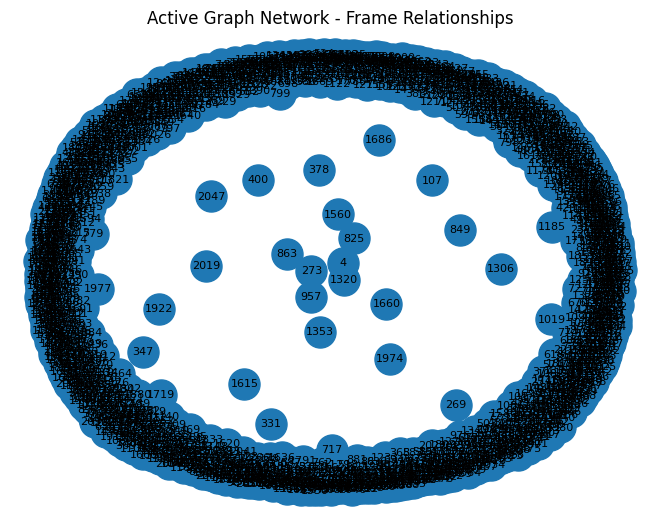

: 

In [1]:
import cv2
import numpy as np
import networkx as nx
from datetime import datetime
from matplotlib import pyplot as plt


class ActiveGraphNetwork:
    """AGN to store and process relationships in real-time."""
    def __init__(self):
        self.graph = nx.DiGraph()

    def add_frame_node(self, frame_id, frame_data):
        """Add a frame as a node in the graph."""
        timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        self.graph.add_node(frame_id, data=frame_data, timestamp=timestamp)

    def add_relationship(self, source_id, target_id, relationship):
        """Add a relationship between two nodes."""
        self.graph.add_edge(source_id, target_id, relationship=relationship)


def uv_filter(frame):
    """Apply a UV filter."""
    blue_channel = frame[:, :, 0]
    red_channel = frame[:, :, 2]
    green_channel = frame[:, :, 1]

    uv_filtered = cv2.subtract(blue_channel, cv2.add(red_channel, green_channel))
    uv_filtered = cv2.normalize(uv_filtered, None, 0, 255, cv2.NORM_MINMAX)
    uv_filtered = cv2.GaussianBlur(uv_filtered, (5, 5), 0)
    return uv_filtered


def night_vision(frame):
    """Apply a Night Vision effect."""
    grayscale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    nightvision_effect = cv2.applyColorMap(grayscale, cv2.COLORMAP_BONE)
    return nightvision_effect


def edge_detection(frame):
    """Apply Edge Detection."""
    edges = cv2.Canny(frame, 100, 200)
    return cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)


def process_frame_with_agn(frame, agn, frame_id):
    """Process the frame and add it to the AGN."""
    agn.add_frame_node(frame_id, frame)
    return frame


def main():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Unable to access the webcam.")
        return

    agn = ActiveGraphNetwork()
    mode = "uv"  # Default mode

    print("Press 'u' for UV Filter, 'n' for Night Vision, 'e' for Edge Detection, 'q' to quit.")

    frame_id = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Unable to fetch frame.")
            break

        # Process frame based on the selected mode
        if mode == "uv":
            processed_frame = uv_filter(frame)
        elif mode == "n":
            processed_frame = night_vision(frame)
        elif mode == "e":
            processed_frame = edge_detection(frame)
        else:
            processed_frame = frame

        # Ensure `processed_frame` has the same number of dimensions as `frame`
        if len(processed_frame.shape) == 2:  # Grayscale output (2D)
            processed_frame = cv2.cvtColor(processed_frame, cv2.COLOR_GRAY2BGR)

        # Update the AGN
        frame_id += 1
        processed_frame = process_frame_with_agn(processed_frame, agn, frame_id)

        # Combine original and processed frames side-by-side
        combined_frame = np.hstack((frame, processed_frame))

        # Display the combined frame
        cv2.imshow("Real-Time Video Processing - AGN", combined_frame)

        # Switch modes or exit
        key = cv2.waitKey(1) & 0xFF
        if key == ord('q'):
            break
        elif key == ord('u'):
            mode = "uv"
        elif key == ord('n'):
            mode = "n"
        elif key == ord('e'):
            mode = "e"

    cap.release()
    cv2.destroyAllWindows()

    # Save AGN Graph Visualization
    print("Saving Active Graph Network Visualization...")
    nx.draw(agn.graph, with_labels=True, node_size=500, font_size=8)
    plt.title("Active Graph Network - Frame Relationships")
    plt.savefig("agn_visualization.png")
    plt.show()

if __name__ == "__main__":
    main()

## Conclusion

This implementation highlights the versatility of Active Graph Networks (AGN) in processing and visualizing real-time video data. By creating a graph structure that stores each frame as a node and maps relationships between them, the project extends traditional video processing techniques to include relational insights. The integration of dynamic filters—UV filtering, night vision effects, and edge detection—demonstrates how AGNs can adapt to different modes while maintaining a consistent relational model.

The project not only provides a foundation for intelligent video processing but also paves the way for more sophisticated applications, such as automated surveillance, real-time pattern recognition, and video-based analytics. The visualization of the AGN graph at the end underscores the potential of graph-based systems in understanding temporal relationships and enhancing decision-making processes. This work serves as an exciting step toward leveraging AGNs and Cube4D concepts in practical, impactful applications.